In [ ]:
import pandas as pd
from ipywidgets import interact, widgets

# Read the relevances_rendered_class.csv file into a DataFrame
df_revl = pd.read_csv('/content/relevances_rendered_class.csv')
df_revl.set_index("Patient ID", inplace=True)

# Initialize a dictionary to store a DataFrame for each patient
patient_dfs = {}

# Function to store selected patient data in separate DataFrames
def store_filtered_data(patient_id):
    selected_data = df_revl.loc[patient_id]
    #filtered_data = selected_data[(selected_data >= 0.0003190452) & (selected_data <= 0.0009207357)]

    # Store filtered data in a new DataFrame and add it to the dictionary
    temp_df = pd.DataFrame(selected_data).transpose()
    temp_df['Patient ID'] = patient_id  # Add Patient ID as a column

    # Store this DataFrame in the dictionary
    patient_dfs[patient_id] = temp_df

    display(temp_df)  # Optionally display the filtered data

# Create a dropdown menu with patient IDs
patient_dropdown = widgets.Dropdown(
    options=df_revl.index,
    description='Patient ID:',
    disabled=False,
)

# Define the interaction between the dropdown and the function
interact(store_filtered_data, patient_id=patient_dropdown);


interactive(children=(Dropdown(description='Patient ID:', options=('GSM615233', 'GSM519226', 'GSM411347', 'GSM…

In [ ]:
# Read the GEO_HG_PPI.csv file
geo_hg_ppi = pd.read_csv('/content/GEO_HG_PPI.csv')
geo_hg_ppi.set_index("probe", inplace=True)

def add_gene_expression_values():
    for patient_id, df in patient_dfs.items():
        # Iterate over the original gene columns (excluding 'Patient ID')
        for gene in df.columns[:-1]:
            # Check if the gene is present in the GEO_HG_PPI index
            if gene in geo_hg_ppi.index and patient_id in geo_hg_ppi.columns:
                # Get the gene expression value
                expression_value = geo_hg_ppi.loc[gene, patient_id]
                # Add a new column for the gene expression value with a suffix '_expr'
                df[f'{gene}_expr'] = expression_value
            else:
                # If the gene or patient ID is not found, set the expression value to None
                df[f'{gene}_expr'] = None

# Call this function after you're done with patient selections
# add_gene_expression_values()


In [ ]:
add_gene_expression_values()

In [ ]:
patient_dfs

{'GSM615233':               RPL41    EEF1A1      TPT1    RPL23A       UBC      RPS2  \
 GSM615233  0.000492  0.000832  0.000442  0.000357  0.000571  0.000411   
 
                ACTB     HUWE1     RPS4X    RPLP0  ...  PTH_expr  RPE65_expr  \
 GSM615233  0.000704  0.000441  0.000452  0.00028  ...  6.230795    6.180551   
 
            KLRC4_expr  G6PC_expr  TLL1_expr  POU1F1_expr  SLC22A3_expr  \
 GSM615233     6.00049   6.224721   6.064821     6.110528      5.968926   
 
            RAG2_expr   SI_expr  MSTN_expr  
 GSM615233    6.08714  6.043412    6.01709  
 
 [1 rows x 13777 columns]}

In [ ]:
df_combined = pd.DataFrame()

def generate_combined_df(patient_id):
    global df_combined
    df = patient_dfs[patient_id]  # Retrieve the DataFrame for the selected patient

    # Split columns into ranking and expression
    ranking_columns = [col for col in df.columns if '_expr' not in col and col != 'Patient ID']
    expression_columns = [col.replace('_expr', '') for col in df.columns if '_expr' in col]

    # Create DataFrame for ranking data
    df_ranking = df[ranking_columns].transpose()
    df_ranking.reset_index(inplace=True)
    df_ranking.columns = ['Gene', 'Ranking']

    # Create DataFrame for expression data
    df_expression = df[[col for col in df.columns if '_expr' in col]].transpose()
    df_expression.reset_index(inplace=True)
    df_expression.columns = ['Gene_expr', 'Gene Expression']
    df_expression['Gene'] = df_expression['Gene_expr'].str.replace('_expr', '')  # Remove '_expr' suffix to match gene names
    df_expression.drop('Gene_expr', axis=1, inplace=True)

    # Merge ranking and expression data on gene names
    df_combined = pd.merge(df_ranking, df_expression, on='Gene', how='inner')

    # Display the combined DataFrame
    display(df_combined)

    return df_combined  # Return the DataFrame for further use


from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown menu with patient IDs from patient_dfs keys
patient_id_dropdown = widgets.Dropdown(
    options=list(patient_dfs.keys()),
    description='Patient ID:',
    disabled=False,
)



# Link the dropdown to the function
interactive_df_display = interactive(generate_combined_df, patient_id=patient_id_dropdown)

# Display the interactive widget
display(interactive_df_display)


interactive(children=(Dropdown(description='Patient ID:', options=('GSM615233',), value='GSM615233'), Output()…

In [ ]:
df_combined

,Gene,Ranking,Gene Expression
0,RPL41,0.000492,13.431648
1,EEF1A1,0.000832,13.563829
2,TPT1,0.000442,13.459339
3,RPL23A,0.000357,13.195257
4,UBC,0.000571,13.061771
...,...,...,...
6883,POU1F1,0.000012,6.110528
6884,SLC22A3,0.000003,5.968926
6885,RAG2,0.000007,6.087140
6886,SI,0.000005,6.043412


In [ ]:
# Sort the DataFrame by the "Ranking" column
df_sorted = df_combined.sort_values(by='Ranking',ascending=False)

# If you want to sort in descending order, add the parameter ascending=False
# df_sorted = df_combined.sort_values(by='Ranking', ascending=False)

# Print the sorted DataFrame
print(df_sorted)
df_combined = df_sorted

         Gene   Ranking  Gene Expression
1      EEF1A1  0.000832        13.563829
64        VIM  0.000740        12.881567
6        ACTB  0.000704        12.979887
21        UBB  0.000687        13.224023
4         UBC  0.000571        13.061771
...       ...       ...              ...
6437   SHCBP1  0.000004         6.014619
6880    KLRC4  0.000003         6.000490
6660   CLEC2D  0.000003         6.026886
6884  SLC22A3  0.000003         5.968926
6591      ICK  0.000001         5.905356

[6888 rows x 3 columns]


In [ ]:
import pandas as pd

# Assuming df_revl is your DataFrame containing the indices
indices = df_revl.index

# Extract the "probe" column
probe_column = geo_hg_ppi['probe']

# Filter the remaining columns using .loc
filtered_df = geo_hg_ppi.loc[:, indices]

# Concatenate the "probe" column and the filtered DataFrame
filtered_df = pd.concat([probe_column, filtered_df], axis=1)

# Display the filtered DataFrame
print(filtered_df)


        probe  GSM615233  GSM519226  GSM411347  GSM615195  GSM615097  \
0       RPL41  13.431648  13.948924  14.027973  13.383143  13.672751   
1      EEF1A1  13.563829  13.524566  13.892742  13.459339  13.841218   
2        TPT1  13.459339  13.431648  13.841218  13.321452  13.752067   
3      RPL23A  13.195257  12.849564  13.361660  13.009293  13.095805   
4         UBC  13.061771  13.795728  13.286573  12.952053  13.107198   
...       ...        ...        ...        ...        ...        ...   
6883   POU1F1   6.110528   6.016465   6.048492   6.145895   6.058185   
6884  SLC22A3   5.968926   6.149613   6.199008   6.045130   6.038711   
6885     RAG2   6.087140   6.051046   6.174173   5.963548   5.980590   
6886       SI   6.043412   6.085963   6.035844   6.118346   5.968926   
6887     MSTN   6.017090   6.029582   5.971536   6.009279   6.007939   

      GSM615221  GSM441751  GSM282516  GSM491230  ...  GSM447247  GSM282450  \
0     13.563829  13.892742  14.027973  13.948924  ...  1

In [ ]:
geo_hg_ppi =filtered_df
geo_hg_ppi.set_index("probe", inplace=True)
geo_hg_ppi

,GSM615233,GSM519226,GSM411347,GSM615195,GSM615097,GSM615221,GSM441751,GSM282516,GSM491230,GSM178025,...,GSM447247,GSM282450,GSM615633,GSM441637,GSM178060,GSM282570,GSM519415,GSM151009,GSM150958,GSM519222
probe,,,,,,,,,,,,,,,,,,,,,
RPL41,13.431648,13.948924,14.027973,13.383143,13.672751,13.563829,13.892742,14.027973,13.948924,13.892742,...,13.269927,13.752067,13.524566,14.027973,14.027973,14.027973,13.948924,13.752067,14.027973,14.027973
EEF1A1,13.563829,13.524566,13.892742,13.459339,13.841218,13.524566,14.027973,14.201369,14.201369,13.795728,...,12.794457,13.892742,13.711606,13.892742,13.524566,13.948924,13.892742,13.491293,13.948924,13.752067
TPT1,13.459339,13.431648,13.841218,13.321452,13.752067,13.238841,13.948924,13.948924,13.841218,13.286573,...,12.809869,13.118830,13.491293,13.615073,13.361660,13.238841,13.383143,13.711606,13.711606,13.269927
RPL23A,13.195257,12.849564,13.361660,13.009293,13.095805,13.286573,13.615073,13.254169,13.459339,13.524566,...,13.130437,13.841218,12.942939,13.752067,13.892742,13.224023,13.168061,13.406419,13.752067,13.340611
UBC,13.061771,13.795728,13.286573,12.952053,13.107198,13.269927,13.224023,13.361660,12.889865,13.672751,...,13.406419,12.779311,13.383143,13.118830,13.130437,13.029795,14.027973,13.303665,13.615073,13.948924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POU1F1,6.110528,6.016465,6.048492,6.145895,6.058185,6.256810,6.085357,6.120654,6.011996,6.272472,...,6.037788,6.052699,6.033852,6.258437,6.090103,6.101276,6.113477,6.400004,6.188308,6.197338
SLC22A3,5.968926,6.149613,6.199008,6.045130,6.038711,5.963548,6.126557,6.106528,5.957399,6.222049,...,6.316513,5.984749,5.878205,6.069783,6.225243,6.044263,6.140620,6.048492,6.036833,6.064821
RAG2,6.087140,6.051046,6.174173,5.963548,5.980590,5.957399,6.011996,5.971536,6.107541,6.051885,...,6.040628,6.136438,6.115904,6.053485,5.950651,6.202296,6.051046,5.982694,6.006483,6.202592


In [ ]:
!pip install gseapy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.9 MB/s eta 0:00:00


In [ ]:
genes = df_combined['Gene'].tolist()
expressions = df_combined['Gene Expression'].tolist()  # or use 'Ranking' if more appropriate


In [ ]:
import gseapy as gp

# Define gene sets
gene_sets = 'KEGG_2016'  # Example gene set, choose based on your study

# Run GSEA
# You might want to adjust parameters like 'min_size', 'max_size', and 'out_dir' based on your needs
enr = gp.enrichr(gene_list=genes,
                 gene_sets=gene_sets,
                 outdir='/content/gsea_report',
                 cutoff=0.05)  # Adjust the cutoff as needed

# View the results
enr.results.head()


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Pathways in cancer Homo sapiens hsa05200,325/397,9.818668e-86,2.876870e-83,0,0,8.968629,1755.501764,RB1;SPI1;ARAF;CBLC;CBLB;CRKL;EDNRA;RASSF1;EDNR...
1,KEGG_2016,PI3K-Akt signaling pathway Homo sapiens hsa04151,264/341,3.172824e-60,4.648187e-58,0,0,6.746894,924.327797,ATF2;PPP2R2A;TCL1B;TCL1A;PPP2R1B;PPP2R1A;CREB3...
2,KEGG_2016,HTLV-I infection Homo sapiens hsa05166,214/258,1.391997e-58,1.359517e-56,0,0,9.523224,1268.676302,RB1;ATF1;ATF2;SPI1;TRRAP;ELK1;ICAM1;CDC20;ELK4...
3,KEGG_2016,Focal adhesion Homo sapiens hsa04510,174/202,1.084157e-52,7.941453e-51,0,0,12.110175,1449.026287,ITGA2B;TNC;ELK1;ACTB;CRKL;MYLK;IGF1R;PPP1CB;CO...
4,KEGG_2016,Regulation of actin cytoskeleton Homo sapiens ...,176/214,2.609412e-47,1.529116e-45,0,0,9.021642,967.682774,CYFIP2;CHRM2;CYFIP1;NCKAP1;CHRM3;CHRM4;CHRM5;I...


In [ ]:
enr.results

In [ ]:
# genes_to_filter = ["RPL30", "RPL3", "RPL31", "RPL12", "RPLP1", "RPL11", "RPL8", "RPL9", "RPL6", "RPS15",
#                    "RPS4X", "RPS14", "RPS15A", "RPS19", "RPS3", "RPL38", "RPS2", "RPS27A", "RPS10",
#                    "RPL41", "RPL22", "RPS6", "RPL23A", "RPL29", "UBA52"]
genes_to_filter = ["RB1", "SPI1", "ARAF", "CBLC", "CBLB", "CRKL", "EDNRA", "RASSF1", "EDNRB", "TFG", "MYC",
                   "AKT2", "AKT3", "AKT1", "PRKACA", "SKP2", "PRKACB", "PRKCG", "PRKCB", "DAPK1", "DAPK2", "FLT3LG",
                   "PRKCA", "BCR", "AR", "AGTR1", "TP53", "CTBP2", "CTBP1", "EPAS1", "PDGFB", "LPAR1", "PDGFA", "LPAR2",
                   "TGFA", "PIK3R3", "KLK3", "PIK3R2", "PIK3R1", "HIF1A", "PIK3R5", "PLCG2", "PLCG1", "FADD", "RALGDS",
                   "FZD1", "STAT5A", "STAT5B", "CREBBP", "FZD3", "JUN", "FZD2", "FZD5", "JUP", "FZD4", "FZD7", "FZD6",
                   "FZD9", "FN1", "IGF1", "GNG12", "GNG11", "PTK2", "GNG13", "GRB2", "RET", "CDKN1A", "CDKN1B", "GLI1",
                   "BRCA2", "GLI3", "GLI2", "IKBKB", "GNGT1", "SHH", "MECOM", "RAC2", "RAC3", "IKBKG", "RAC1", "HRAS",
                   "APPL1", "JAK1", "APC2", "NCOA4", "FOS", "RHOA", "PLCB3", "PAX8", "KIT", "RARA", "CKS2", "RARB",
                   "PPARG", "PLCB1", "PLCB2", "PPARD", "FH", "PTGER1", "GSTP1", "PTGER2", "PTGER3", "ADCY3", "XIAP",
                   "CXCR4", "ADCY8", "PTGS2", "ADCY7", "ADCY6", "EGFR", "RELA", "RXRB", "NRAS", "RXRA", "BID",
                   "RXRG", "RUNX1T1", "EGLN1", "ARNT2", "EGLN3", "CDKN2B", "STAT1", "CDKN2A", "WNT7B", "STAT3",
                   "VEGFB", "WNT7A", "VEGFC", "MLH1", "VEGFA", "KITLG", "CCDC6", "CTNNB1", "FAS", "F2RL3", "CSF3R",
                   "ITGA2B", "FGF1", "FGF2", "ETS1", "FGF3", "FGF4", "IGF1R", "FGF5", "FGF6", "FGF7", "FGF8", "FGF9",
                   "CCND1", "CDH1", "EP300", "PDGFRB", "PDGFRA", "MAP2K1", "RALBP1", "MAP2K2", "WNT5B", "TPM3", "HGF",
                   "F2R", "WNT5A", "MITF", "PGF", "PIAS2", "RBX1", "MSH6", "MSH2", "SMO", "COL4A2", "CCNE2", "MSH3",
                   "COL4A1", "CCNE1", "COL4A4", "COL4A3", "COL4A6", "COL4A5", "RAF1", "CSF1R", "MAX", "CUL2", "RASGRP2",
                   "PLD1", "STK4", "CSF2RA", "RASGRP1", "FOXO1", "HSP90B1", "RASGRP3", "WNT6", "TPR", "DVL1", "ABL1", "DVL2",
                   "DVL3", "WNT1", "FGF23", "WNT2", "WNT4", "SMAD2", "TGFB2", "SMAD4", "TGFB1", "SMAD3", "TGFB3", "ZBTB16",
                   "PTCH1", "PTCH2", "NFKB1", "NFKB2", "FGF17", "NFKBIA", "BMP4", "BMP2", "IL6", "CXCL12", "CDK6", "CDK4",
                   "GNB2", "CDK2", "FGF18", "GNB1", "MDM2", "BCL2", "GNB3", "CYCS", "GNB5", "FGF13", "FGFR3", "FGF12",
                   "FGFR2", "BCL2L1", "FGFR1", "ITGB1", "GSK3B", "HSP90AB1", "FLT3", "PTEN", "SLC2A1", "PIK3CD", "FASLG",
                   "LAMC2", "PIK3CB", "LAMC1", "PIK3CG", "CKS1B", "CASP9", "CASP8", "CASP3", "BDKRB2", "ITGAV", "NKX3-1",
                   "ARHGEF11", "HSP90AA1", "ARHGEF12", "CHUK", "ITGA3", "MMP1", "DCC", "ITGA2", "MMP2", "AXIN1", "ARNT",
                   "TRAF2", "TRAF1", "MMP9", "TGFBR1", "TGFBR2", "TRAF4", "PIK3CA", "TRAF3", "TRAF6", "TRAF5", "BIRC5",
                   "ITGA6", "BIRC7", "SOS1", "SOS2", "MET", "CRK", "BIRC2", "BIRC3", "CEBPA", "LAMA5", "HDAC2",
                   "RALA", "RALB", "ROCK1", "LAMA2", "ROCK2", "HDAC1", "LAMA1", "LAMA4", "LEF1", "LAMA3",
                   "CBL", "CDC42", "MAPK9", "GNG3", "MAPK8", "GNG5", "GNG4", "GNG7", "ERBB2", "E2F1",
                   "E2F2", "MAPK1", "E2F3", "VHL", "MAPK3", "NTRK1", "TCF7L2", "TCF7L1", "LAMB3", "NOS2",
                   "EGF", "BAD", "LAMB1", "MTOR", "PML", "MAPK10", "RAD51", "APC", "BAX", "KRAS"]


metastatic = df_combined[(df_combined['Gene'].isin(genes_to_filter)) & pd.notnull(df_combined['Gene Expression'])]


In [ ]:
metastatic

,Gene,Ranking,Gene Expression
47,HSP90AA1,0.000487,11.298702
98,RHOA,0.000480,11.495531
106,RAC1,0.000470,10.957316
140,ITGB1,0.000441,10.728628
355,STAT3,0.000383,10.097003
...,...,...,...
4743,F2R,0.000017,6.209604
5409,CCNE2,0.000016,6.192940
6309,FZD3,0.000014,6.239251
5167,MMP1,0.000013,6.085050


In [ ]:
import pandas as pd

# Assuming `geo_hg_ppi` is your DataFrame
transposed_geo_hg_ppi = geo_hg_ppi.transpose()

# Filter the transposed DataFrame
filtered_transposed_geo_hg_ppi = transposed_geo_hg_ppi.loc[:, transposed_geo_hg_ppi.columns.isin(genes_to_filter)]



In [ ]:
filtered_transposed_geo_hg_ppi

probe,HSP90AA1,FN1,HSP90AB1,RHOA,RAC1,ITGB1,NCOA4,GNG5,NFKBIA,CTBP2,...,DCC,PTGS2,CDKN2B,KITLG,NTRK1,FGF12,BRCA2,FGF8,GNGT1,VHL
GSM615233,11.298702,9.357315,10.564876,11.495531,10.957316,10.728628,11.048610,10.105203,9.947303,9.412143,...,6.937126,6.761468,6.498055,6.300003,6.875761,6.589330,6.089542,6.525877,6.358451,6.246107
GSM519226,13.072628,13.321452,11.419973,10.964294,11.145036,11.858803,9.834230,9.953315,9.833153,10.871873,...,6.420017,7.044532,6.758041,6.917272,6.540529,6.400633,6.845563,6.512430,6.598488,6.245626
GSM411347,12.553796,12.713597,11.107853,11.891510,11.140808,11.820581,10.405236,10.126184,9.002503,9.732167,...,6.422287,6.622737,6.707530,6.767124,6.447445,6.528824,7.083989,6.601811,6.090678,6.131121
GSM615195,12.144439,11.617338,11.575701,11.250830,10.913759,10.645599,10.264624,10.476245,10.616271,9.870941,...,6.648885,6.480206,6.329303,6.342836,6.647340,6.723352,6.306364,6.366587,6.257753,6.154424
GSM615097,11.917267,12.022424,11.457092,11.201048,11.227591,11.209948,10.313402,10.129054,9.880784,10.494935,...,6.754731,6.290845,6.360394,6.458466,6.673980,6.638935,6.114443,6.150971,6.373777,6.072496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM282570,12.157939,11.846065,12.036060,10.790119,11.022359,9.491976,9.393904,10.366324,9.209057,9.316397,...,6.816028,6.488464,6.657828,6.395019,6.520673,6.549242,6.460242,6.353447,6.417667,6.317499
GSM519415,11.696028,12.898489,11.332384,11.581699,10.878296,11.435769,10.393937,10.424512,10.303012,10.458034,...,6.343097,7.110400,6.734720,6.851526,6.430246,6.376563,6.847519,6.638250,6.161841,6.118804
GSM151009,11.904363,13.209737,11.322817,11.327566,11.462694,10.635781,10.057691,9.850275,10.597201,11.140808,...,6.418190,6.654160,6.644320,6.420743,6.798378,6.682915,6.143055,6.574517,6.421623,6.406759
GSM150958,12.130860,12.499761,11.665675,11.523437,11.714368,10.887819,10.576396,9.961681,10.456037,10.989235,...,6.567249,6.809087,6.711154,6.497538,6.825635,6.610354,6.146691,6.574839,6.382330,6.380161


In [ ]:
import pandas as pd

labels_GEO_HG = pd.read_csv('/content/labels_GEO_HG.csv')


# Assuming df_revl is your DataFrame containing the indices
indices = df_revl.index

# Filter the columns in labels_GEO_HG using .loc
filtered_df = labels_GEO_HG.loc[:, indices]

# List of elements to remove
elements_to_remove = [
    'GSM519226', 'GSM615097', 'GSM491286', 'GSM519144', 'GSM615236', 'GSM282535',
    'GSM282520', 'GSM151330', 'GSM519193', 'GSM50085', 'GSM447213', 'GSM519153',
    'GSM519414', 'GSM411319', 'GSM411395', 'GSM151008', 'GSM615198', 'GSM151344'
]

# Remove the elements from filtered_df
filtered_df = filtered_df.drop(columns=elements_to_remove, errors='ignore')


# Display the filtered DataFrame
print(filtered_df)



Patient ID  GSM615233  GSM411347  GSM615195  GSM615221  GSM441751  GSM282516  \
0                   1          1          1          1          0          0   

Patient ID  GSM491230  GSM178025  GSM441624  GSM615184  ...  GSM447247  \
0                   0          1          0          0  ...          1   

Patient ID  GSM282450  GSM615633  GSM441637  GSM178060  GSM282570  GSM519415  \
0                   0          0          0          1          1          0   

Patient ID  GSM151009  GSM150958  GSM519222  
0                   0          0          1  

[1 rows x 79 columns]


In [ ]:


transposed_labels_GEO_HG = filtered_df.transpose()

# Concatenate the transposed DataFrames
combined_data = pd.concat([transposed_labels_GEO_HG, filtered_transposed_geo_hg_ppi], axis=1)

In [ ]:
combined_data

,0,HSP90AA1,FN1,HSP90AB1,RHOA,RAC1,ITGB1,NCOA4,GNG5,NFKBIA,...,DCC,PTGS2,CDKN2B,KITLG,NTRK1,FGF12,BRCA2,FGF8,GNGT1,VHL
GSM615233,1,11.298702,9.357315,10.564876,11.495531,10.957316,10.728628,11.048610,10.105203,9.947303,...,6.937126,6.761468,6.498055,6.300003,6.875761,6.589330,6.089542,6.525877,6.358451,6.246107
GSM519226,0,13.072628,13.321452,11.419973,10.964294,11.145036,11.858803,9.834230,9.953315,9.833153,...,6.420017,7.044532,6.758041,6.917272,6.540529,6.400633,6.845563,6.512430,6.598488,6.245626
GSM411347,1,12.553796,12.713597,11.107853,11.891510,11.140808,11.820581,10.405236,10.126184,9.002503,...,6.422287,6.622737,6.707530,6.767124,6.447445,6.528824,7.083989,6.601811,6.090678,6.131121
GSM615195,1,12.144439,11.617338,11.575701,11.250830,10.913759,10.645599,10.264624,10.476245,10.616271,...,6.648885,6.480206,6.329303,6.342836,6.647340,6.723352,6.306364,6.366587,6.257753,6.154424
GSM615097,0,11.917267,12.022424,11.457092,11.201048,11.227591,11.209948,10.313402,10.129054,9.880784,...,6.754731,6.290845,6.360394,6.458466,6.673980,6.638935,6.114443,6.150971,6.373777,6.072496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM282570,1,12.157939,11.846065,12.036060,10.790119,11.022359,9.491976,9.393904,10.366324,9.209057,...,6.816028,6.488464,6.657828,6.395019,6.520673,6.549242,6.460242,6.353447,6.417667,6.317499
GSM519415,0,11.696028,12.898489,11.332384,11.581699,10.878296,11.435769,10.393937,10.424512,10.303012,...,6.343097,7.110400,6.734720,6.851526,6.430246,6.376563,6.847519,6.638250,6.161841,6.118804
GSM151009,0,11.904363,13.209737,11.322817,11.327566,11.462694,10.635781,10.057691,9.850275,10.597201,...,6.418190,6.654160,6.644320,6.420743,6.798378,6.682915,6.143055,6.574517,6.421623,6.406759
GSM150958,0,12.130860,12.499761,11.665675,11.523437,11.714368,10.887819,10.576396,9.961681,10.456037,...,6.567249,6.809087,6.711154,6.497538,6.825635,6.610354,6.146691,6.574839,6.382330,6.380161


In [ ]:
# Assuming `combined_data` is your DataFrame
metastatic_data = combined_data[combined_data[0] == 1]
non_metastatic_data = combined_data[combined_data[0] == 0]


In [ ]:
# Remove index and column 0
metastatic_data_cleaned = metastatic_data.reset_index(drop=True).drop(columns=0)
non_metastatic_data_cleaned = non_metastatic_data.reset_index(drop=True).drop(columns=0)

# Calculate average of each column
metastatic_data_avg = metastatic_data_cleaned.mean()
non_metastatic_data_avg = non_metastatic_data_cleaned.mean()


In [ ]:
# Assuming `df_revl` is your DataFrame
# Remove index
df_revl_cleaned = df_revl.reset_index(drop=True)

# Calculate average of each column
df_revl_avg = df_revl_cleaned.mean()


In [ ]:
# Create a DataFrame from df_revl_avg
df_revl_avg_df = df_revl_avg.to_frame().reset_index()

# Sort the DataFrame
sorted_df_revl_avg = df_revl_avg_df.sort_values(by=0, ascending=False).reset_index(drop=True)

# Add the rank column
sorted_df_revl_avg['Rank'] = sorted_df_revl_avg.index + 1

# Rename columns
sorted_df_revl_avg.columns = ['Feature', 'Average', 'Rank']

# Filter for the selected features
# selected_features = ['RPL41', 'RPL23A', 'RPS2', 'RPS4X', 'RPS10', 'RPS15A', 'RPLP1', 'RPS15',
#     'RPL31', 'RPS14', 'RPL30', 'RPS6', 'RPS19', 'RPL12', 'RPL3', 'RPL9',
#     'RPL38', 'RPS3', 'RPL8', 'RPL22', 'RPL29', 'RPS27A', 'RPL6', 'UBA52']
selected_features =genes_to_filter
selected_ranks = sorted_df_revl_avg[sorted_df_revl_avg['Feature'].isin(selected_features)]

# Display the result
print(selected_ranks)


       Feature   Average  Rank
6     HSP90AA1  0.000560     7
9          FN1  0.000549    10
16        RAC1  0.000474    17
19        RHOA  0.000458    20
20       ITGB1  0.000450    21
...        ...       ...   ...
6543       VHL  0.000023  6544
6653     PTGS2  0.000020  6654
6730    PTGER2  0.000017  6731
6743     GNGT1  0.000017  6744
6757      FGF8  0.000016  6758

[325 rows x 3 columns]


In [ ]:
selected_ranks.head(60)

In [ ]:
# Filter the DataFrame
filtered_df_revl = df_revl_avg[["RB1", "SPI1", "ARAF", "CBLC", "CBLB", "CRKL"]]
filtered_df_revl

RB1     0.000149
SPI1    0.000088
ARAF    0.000158
CBLC    0.000059
CBLB    0.000132
CRKL    0.000195
dtype: float64

In [ ]:
# Calculate the difference
difference = metastatic_data_avg - non_metastatic_data_avg
# Find the top 25 values
top_25 = difference.nlargest(5)
top_25

CKS2      0.652371
BIRC5     0.592532
CKS1B     0.527447
VEGFA     0.522860
CDKN2A    0.512694
dtype: float64

In [ ]:
difference_df = metastatic_data_avg.sub(non_metastatic_data_avg).reset_index()
difference_df.columns = ['Gene', 'Difference']
print(difference_df)
genes_list = [
    'RPL41', 'RPL23A', 'RPS2', 'RPS4X', 'RPS10', 'RPS15A', 'RPLP1', 'RPS15',
    'RPL31', 'RPS14', 'RPL30', 'RPS6', 'RPS19', 'RPL12', 'RPL3', 'RPL9',
    'RPL38', 'RPS3', 'RPL8', 'RPL22', 'RPL29', 'RPS27A', 'RPL6', 'UBA52'
]
filtered_df = difference_df[difference_df['Gene'].isin(genes_list)]
print(filtered_df)



         Gene  Difference
0    HSP90AA1   -0.012126
1         FN1   -0.420087
2    HSP90AB1    0.058150
3        RHOA    0.119066
4        RAC1   -0.053912
..        ...         ...
320     FGF12    0.032763
321     BRCA2    0.112006
322      FGF8   -0.020728
323     GNGT1   -0.037810
324       VHL   -0.054941

[325 rows x 2 columns]
Empty DataFrame
Columns: [Gene, Difference]
Index: []


In [ ]:
df_sorted.head(5)

,Gene,Ranking,Gene Expression
1,EEF1A1,0.000832,13.563829
64,VIM,0.000740,12.881567
6,ACTB,0.000704,12.979887
21,UBB,0.000687,13.224023
4,UBC,0.000571,13.061771


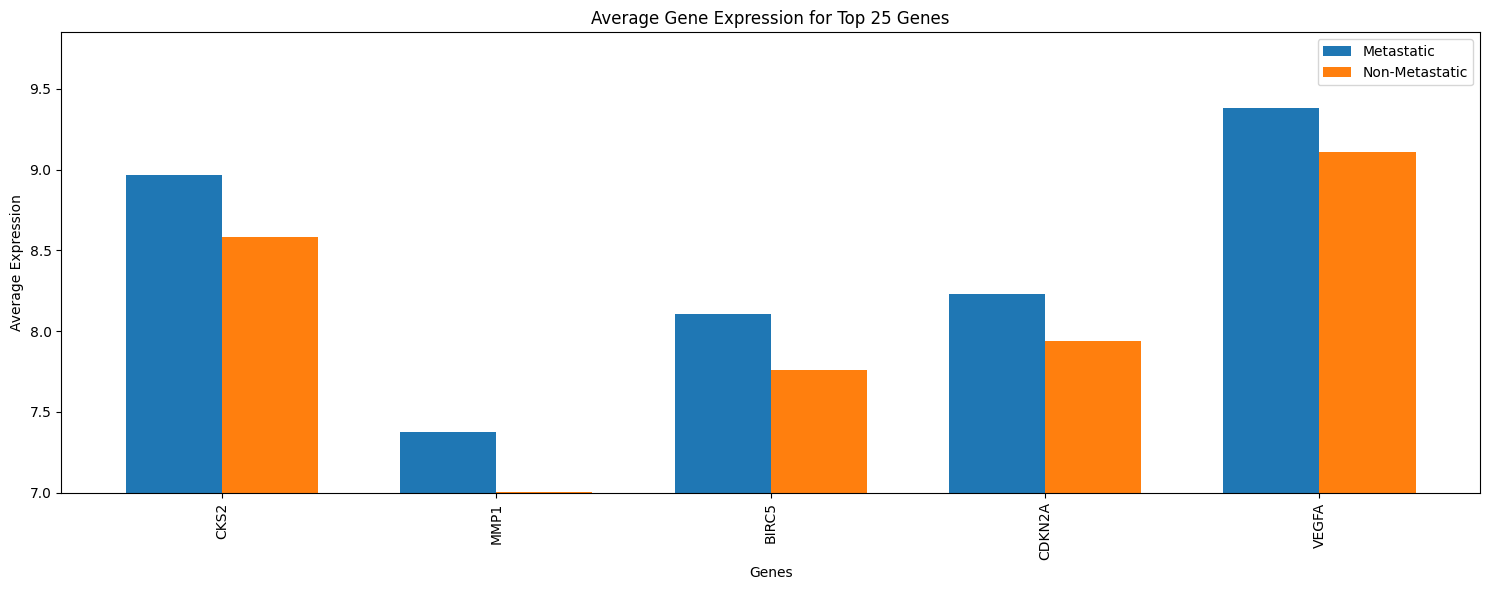

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `top_25` contains the top 25 genes

# Filter the original data frames
metastatic_data_top_25 = metastatic_data[top_25.index]
non_metastatic_data_top_25 = non_metastatic_data[top_25.index]

# Calculate the average expression for each gene
metastatic_avg_top_25 = metastatic_data_top_25.mean()
non_metastatic_avg_top_25 = non_metastatic_data_top_25.mean()

# Set up the data for the bar plot
genes = top_25.index
bar_width = 0.35
index = np.arange(len(genes))

# Create the bar plot
plt.figure(figsize=(15, 6))
bar1 = plt.bar(index, metastatic_avg_top_25, bar_width, label='Metastatic')
bar2 = plt.bar(index + bar_width, non_metastatic_avg_top_25, bar_width, label='Non-Metastatic')

plt.xlabel('Genes')
plt.ylabel('Average Expression')
plt.title('Average Gene Expression for Top 25 Genes')
plt.xticks(index + bar_width / 2, genes, rotation=90)
plt.legend()

# Set the y-axis limit to start from 7
plt.ylim(7, plt.ylim()[1])

plt.tight_layout()
plt.show()


In [ ]:
# genes_to_filter = ["RPL30", "RPL3", "RPL31", "RPL12", "RPLP1", "RPL11", "RPL8", "RPL9", "RPL6", "RPS15",
#                    "RPS4X", "RPS14", "RPS15A", "RPS19", "RPS3", "RPL38", "RPS2", "RPS27A", "RPS10",
#                    "RPL41", "RPL22", "RPS6", "RPL23A", "RPL29", "UBA52"]

genes_to_filter = ["RB1", "SPI1", "ARAF", "CBLC", "CBLB", "CRKL", "EDNRA", "RASSF1", "EDNRB", "TFG", "MYC",
                   "AKT2", "AKT3", "AKT1", "PRKACA", "SKP2", "PRKACB", "PRKCG", "PRKCB", "DAPK1", "DAPK2", "FLT3LG",
                   "PRKCA", "BCR", "AR", "AGTR1", "TP53", "CTBP2", "CTBP1", "EPAS1", "PDGFB", "LPAR1", "PDGFA", "LPAR2",
                   "TGFA", "PIK3R3", "KLK3", "PIK3R2", "PIK3R1", "HIF1A", "PIK3R5", "PLCG2", "PLCG1", "FADD", "RALGDS",
                   "FZD1", "STAT5A", "STAT5B", "CREBBP", "FZD3", "JUN", "FZD2", "FZD5", "JUP", "FZD4", "FZD7", "FZD6",
                   "FZD9", "FN1", "IGF1", "GNG12", "GNG11", "PTK2", "GNG13", "GRB2", "RET", "CDKN1A", "CDKN1B", "GLI1",
                   "BRCA2", "GLI3", "GLI2", "IKBKB", "GNGT1", "SHH", "MECOM", "RAC2", "RAC3", "IKBKG", "RAC1", "HRAS",
                   "APPL1", "JAK1", "APC2", "NCOA4", "FOS", "RHOA", "PLCB3", "PAX8", "KIT", "RARA", "CKS2", "RARB",
                   "PPARG", "PLCB1", "PLCB2", "PPARD", "FH", "PTGER1", "GSTP1", "PTGER2", "PTGER3", "ADCY3", "XIAP",
                   "CXCR4", "ADCY8", "PTGS2", "ADCY7", "ADCY6", "EGFR", "RELA", "RXRB", "NRAS", "RXRA", "BID",
                   "RXRG", "RUNX1T1", "EGLN1", "ARNT2", "EGLN3", "CDKN2B", "STAT1", "CDKN2A", "WNT7B", "STAT3",
                   "VEGFB", "WNT7A", "VEGFC", "MLH1", "VEGFA", "KITLG", "CCDC6", "CTNNB1", "FAS", "F2RL3", "CSF3R",
                   "ITGA2B", "FGF1", "FGF2", "ETS1", "FGF3", "FGF4", "IGF1R", "FGF5", "FGF6", "FGF7", "FGF8", "FGF9",
                   "CCND1", "CDH1", "EP300", "PDGFRB", "PDGFRA", "MAP2K1", "RALBP1", "MAP2K2", "WNT5B", "TPM3", "HGF",
                   "F2R", "WNT5A", "MITF", "PGF", "PIAS2", "RBX1", "MSH6", "MSH2", "SMO", "COL4A2", "CCNE2", "MSH3",
                   "COL4A1", "CCNE1", "COL4A4", "COL4A3", "COL4A6", "COL4A5", "RAF1", "CSF1R", "MAX", "CUL2", "RASGRP2",
                   "PLD1", "STK4", "CSF2RA", "RASGRP1", "FOXO1", "HSP90B1", "RASGRP3", "WNT6", "TPR", "DVL1", "ABL1", "DVL2",
                   "DVL3", "WNT1", "FGF23", "WNT2", "WNT4", "SMAD2", "TGFB2", "SMAD4", "TGFB1", "SMAD3", "TGFB3", "ZBTB16",
                   "PTCH1", "PTCH2", "NFKB1", "NFKB2", "FGF17", "NFKBIA", "BMP4", "BMP2", "IL6", "CXCL12", "CDK6", "CDK4",
                   "GNB2", "CDK2", "FGF18", "GNB1", "MDM2", "BCL2", "GNB3", "CYCS", "GNB5", "FGF13", "FGFR3", "FGF12",
                   "FGFR2", "BCL2L1", "FGFR1", "ITGB1", "GSK3B", "HSP90AB1", "FLT3", "PTEN", "SLC2A1", "PIK3CD", "FASLG",
                   "LAMC2", "PIK3CB", "LAMC1", "PIK3CG", "CKS1B", "CASP9", "CASP8", "CASP3", "BDKRB2", "ITGAV", "NKX3-1",
                   "ARHGEF11", "HSP90AA1", "ARHGEF12", "CHUK", "ITGA3", "MMP1", "DCC", "ITGA2", "MMP2", "AXIN1", "ARNT",
                   "TRAF2", "TRAF1", "MMP9", "TGFBR1", "TGFBR2", "TRAF4", "PIK3CA", "TRAF3", "TRAF6", "TRAF5", "BIRC5",
                   "ITGA6", "BIRC7", "SOS1", "SOS2", "MET", "CRK", "BIRC2", "BIRC3", "CEBPA", "LAMA5", "HDAC2",
                   "RALA", "RALB", "ROCK1", "LAMA2", "ROCK2", "HDAC1", "LAMA1", "LAMA4", "LEF1", "LAMA3",
                   "CBL", "CDC42", "MAPK9", "GNG3", "MAPK8", "GNG5", "GNG4", "GNG7", "ERBB2", "E2F1",
                   "E2F2", "MAPK1", "E2F3", "VHL", "MAPK3", "NTRK1", "TCF7L2", "TCF7L1", "LAMB3", "NOS2",
                   "EGF", "BAD", "LAMB1", "MTOR", "PML", "MAPK10", "RAD51", "APC", "BAX", "KRAS"]

non_metastatic = df_combined[(df_combined['Gene'].isin(genes_to_filter)) & pd.notnull(df_combined['Gene Expression'])]

In [ ]:
non_metastatic

,Gene,Ranking,Gene Expression
0,RPL41,0.000530,13.892742
3,RPL23A,0.000377,13.615073
5,RPS2,0.000417,13.361660
8,RPS4X,0.000458,12.979887
9,RPS10,0.000433,13.303665
14,RPS15A,0.000334,13.019293
15,RPLP1,0.000377,12.628617
16,RPS15,0.000338,12.573794
18,RPL31,0.000405,12.841417
20,RPS14,0.000337,12.499761


In [ ]:
import pandas as pd

# Assuming 'non_metastatic' and 'metastatic' are the DataFrames

# Concatenate the two DataFrames
concatenated_df = pd.concat([non_metastatic['Gene'], metastatic['Gene']])

# Drop duplicates to keep only unique genes
different_genes = concatenated_df.drop_duplicates(keep=False)

# Display the different genes
print(different_genes)


94    RPL11
Name: Gene, dtype: object


In [ ]:
import plotly.express as px

# Assuming 'merged_df' is the merged DataFrame from the previous code snippet
# Merge the two DataFrames on the 'Gene' column
merged_df = pd.merge(metastatic, non_metastatic, on='Gene', suffixes=('_metastatic', '_non_metastatic'))

import plotly.express as px

# Convert 'Gene Expression' columns to numeric
merged_df['Gene Expression_metastatic'] = pd.to_numeric(merged_df['Gene Expression_metastatic'], errors='coerce')
merged_df['Gene Expression_non_metastatic'] = pd.to_numeric(merged_df['Gene Expression_non_metastatic'], errors='coerce')

# Create an interactive grouped bar plot
fig = px.bar(merged_df, x='Gene', y=['Gene Expression_metastatic', 'Gene Expression_non_metastatic'],
             title='Gene Expression by Gene and Metastatic Status',
             labels={'value': 'Gene Expression', 'variable': 'Status'}, barmode='group')

# Set y-axis range to start from 10
fig.update_yaxes(range=[11, max(merged_df['Gene Expression_metastatic'].max(), merged_df['Gene Expression_non_metastatic'].max())])

# Show the plot
fig.show()


In [ ]:
merged_df

,Gene,Ranking_metastatic,Gene Expression_metastatic,Ranking_non_metastatic,Gene Expression_non_metastatic
0,RPL41,0.000492,13.431648,0.000530,13.892742
1,RPL23A,0.000357,13.195257,0.000377,13.615073
2,RPS2,0.000411,13.029795,0.000417,13.361660
3,RPS4X,0.000452,12.849564,0.000458,12.979887
4,RPS10,0.000425,12.989799,0.000433,13.303665
5,RPS15A,0.000332,12.865515,0.000334,13.019293
6,RPLP1,0.000395,12.671026,0.000377,12.628617
7,RPS15,0.000336,12.393316,0.000338,12.573794
8,RPL31,0.000429,12.906840,0.000405,12.841417
9,RPS14,0.000349,12.419793,0.000337,12.499761


In [ ]:
import pandas as pd

# Assuming 'merged_df' is the merged DataFrame from before

# Calculate the difference between 'Gene Expression_metastatic' and 'Gene Expression_non_metastatic'
merged_df['Expression Difference'] = merged_df['Gene Expression_metastatic'] - merged_df['Gene Expression_non_metastatic']

# Create a new DataFrame with 'Gene' and 'Expression Difference' columns
new_df = merged_df[['Gene', 'Expression Difference']].copy()

# Display the new DataFrame
print(new_df)


      Gene  Expression Difference
0    RPL41              -0.461094
1   RPL23A              -0.419817
2     RPS2              -0.331865
3    RPS4X              -0.130323
4    RPS10              -0.313865
5   RPS15A              -0.153778
6    RPLP1               0.042409
7    RPS15              -0.180478
8    RPL31               0.065422
9    RPS14              -0.079967
10   RPL30              -0.040439
11    RPS6               0.035562
12   RPS19              -0.444109
13   RPL12              -0.190336
14    RPL3              -0.271953
15    RPL9               0.260822
16   RPL38               0.270879
17    RPS3              -0.053718
18    RPL8               0.012819
19   RPL22              -0.330023
20   RPL29               0.155327
21  RPS27A               0.018023
22    RPL6               0.000000
23   UBA52               0.942591


In [ ]:
import plotly.express as px

# Calculate the absolute value of 'Expression Difference'
new_df['Expression Difference'] = new_df['Expression Difference'].abs()

# Filter the DataFrame where the absolute value of 'Expression Difference' is greater than 0.4
filtered_df = new_df[new_df['Expression Difference'] > 0.4]

# Create a bar plot
fig = px.bar(filtered_df, x='Gene', y='Expression Difference',
             title='Genes with Absolute Expression Difference > 0.4',
             labels={'Expression Difference': 'Expression Difference'})

# Show the plot
fig.show()


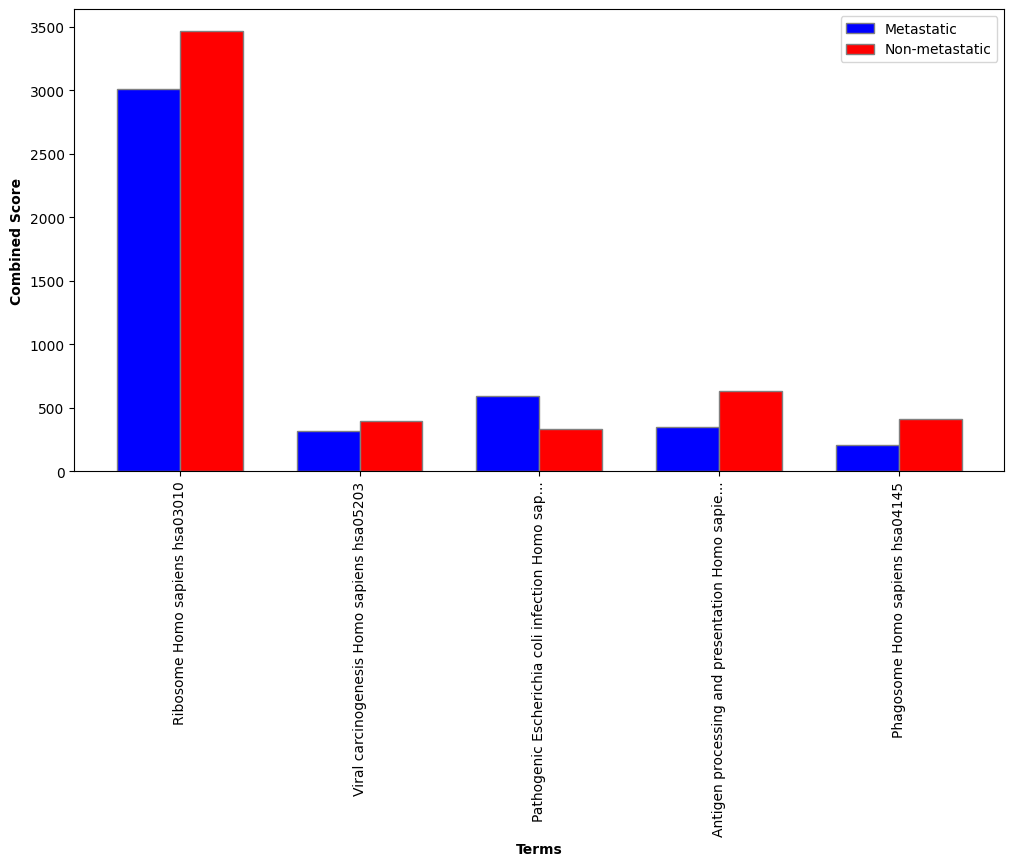

In [ ]:
import matplotlib.pyplot as plt

# Data for metastatic group
metastatic_terms = [
    'Ribosome Homo sapiens hsa03010',
    'Viral carcinogenesis Homo sapiens hsa05203',
    'Pathogenic Escherichia coli infection Homo sap...',
    'Antigen processing and presentation Homo sapie...',
    'Phagosome Homo sapiens hsa04145'
]
metastatic_scores = [3009.591043, 315.223983, 588.257780, 346.085916, 204.151124]

# Data for non-metastatic group
non_metastatic_terms = [
    'Ribosome Homo sapiens hsa03010',
    'Viral carcinogenesis Homo sapiens hsa05203',
    'Epstein-Barr virus infection Homo sapiens hsa0...',
    'Antigen processing and presentation Homo sapie...',
    'AGE-RAGE signaling pathway in diabetic complic...'
]
non_metastatic_scores = [3464.733815, 391.068196, 331.980373, 633.352057, 412.544938]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(metastatic_terms))
r2 = [x + bar_width for x in r1]

# Plot bars
ax.bar(r1, metastatic_scores, color='b', width=bar_width, edgecolor='grey', label='Metastatic')
ax.bar(r2, non_metastatic_scores, color='r', width=bar_width, edgecolor='grey', label='Non-metastatic')

# Add xticks on the middle of the group bars
ax.set_xlabel('Terms', fontweight='bold')
ax.set_ylabel('Combined Score', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(metastatic_terms))])
ax.set_xticklabels(metastatic_terms, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()


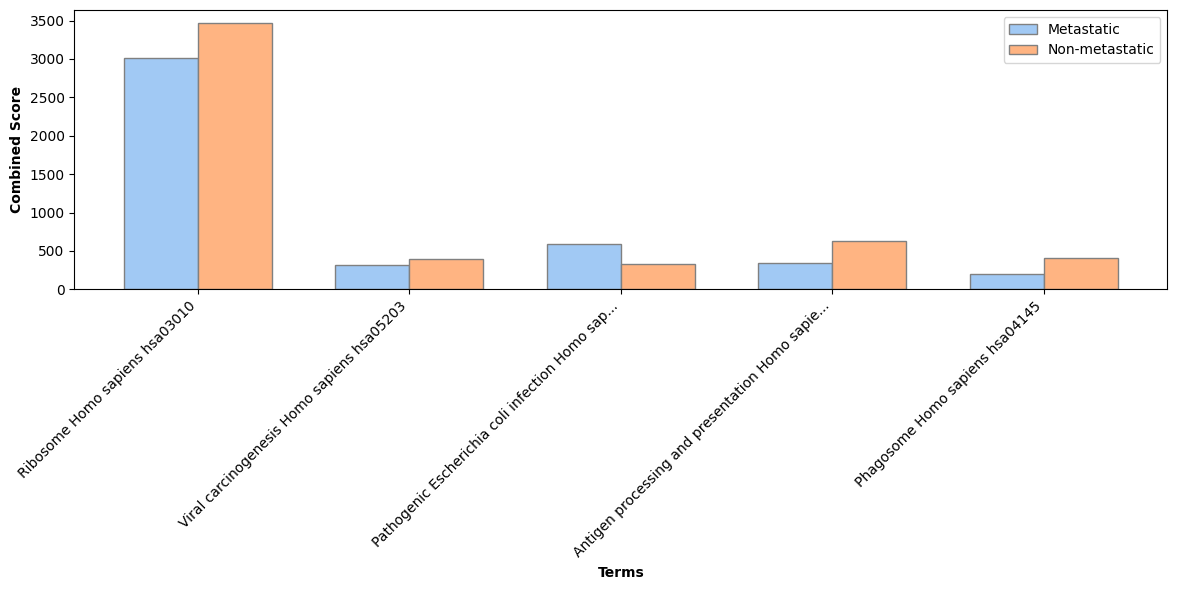

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
colors = sns.color_palette("pastel")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(metastatic_terms))
r2 = [x + bar_width for x in r1]

# Plot bars
ax.bar(r1, metastatic_scores, color=colors[0], width=bar_width, edgecolor='grey', label='Metastatic')
ax.bar(r2, non_metastatic_scores, color=colors[1], width=bar_width, edgecolor='grey', label='Non-metastatic')

# Add xticks on the middle of the group bars
ax.set_xlabel('Terms', fontweight='bold')
ax.set_ylabel('Combined Score', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(metastatic_terms))])
ax.set_xticklabels(metastatic_terms, rotation=45, ha='right')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()  # Adjust plot to prevent clipping of labels
plt.show()


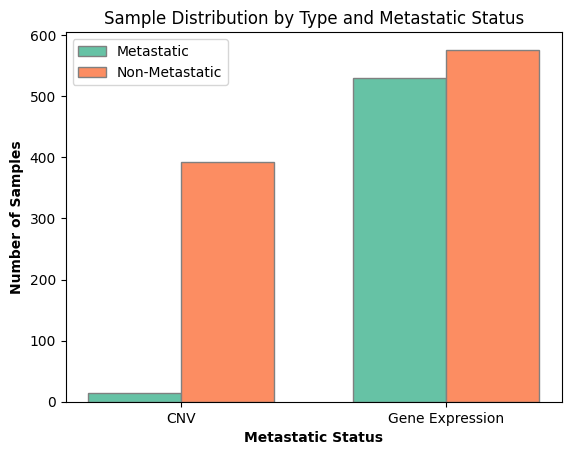

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data (replace with your data)
data = {
    'CNV': [14, 529],
    'Gene Expression': [393, 576]
}

# Metastatic status labels
metastatic_status = ['CNV', 'Gene Expression']

# Select a color palette
colors = sns.color_palette("Set2")

# Create a figure and axis
fig, ax = plt.subplots()

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(metastatic_status))
r2 = [x + bar_width for x in r1]

# Create bars with the selected colors
plt.bar(r1, data['CNV'], color=colors[0], width=bar_width, edgecolor='grey', label='Metastatic')
plt.bar(r2, data['Gene Expression'], color=colors[1], width=bar_width, edgecolor='grey', label='Non-Metastatic')

# Add xticks on the middle of the group bars
plt.xlabel('Metastatic Status', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(metastatic_status))], metastatic_status)

# Add y label
plt.ylabel('Number of Samples', fontweight='bold')

# Create legend and show graphic
plt.legend()
plt.title('Sample Distribution by Type and Metastatic Status')
plt.show()


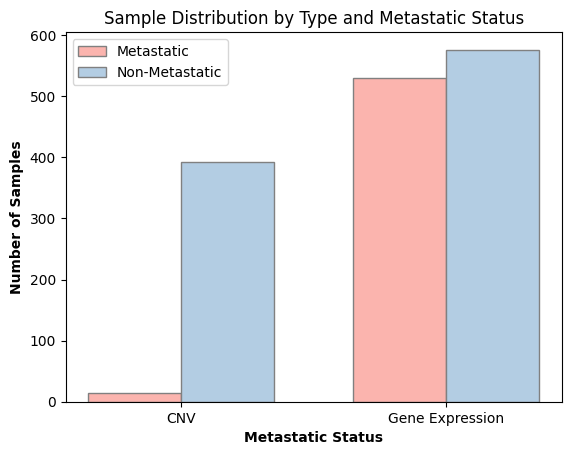

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data (replace with your data)
data = {
    'CNV': [14, 529],
    'Gene Expression': [393, 576]
}

# Metastatic status labels
metastatic_status = ['CNV', 'Gene Expression']

# Select a color palette
colors = sns.color_palette("Pastel1")

# Create a figure and axis
fig, ax = plt.subplots()

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(metastatic_status))
r2 = [x + bar_width for x in r1]

# Create bars with the selected colors
plt.bar(r1, data['CNV'], color=colors[0], width=bar_width, edgecolor='grey', label='Metastatic')
plt.bar(r2, data['Gene Expression'], color=colors[1], width=bar_width, edgecolor='grey', label='Non-Metastatic')

# Add xticks on the middle of the group bars
plt.xlabel('Metastatic Status', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(metastatic_status))], metastatic_status)

# Add y label
plt.ylabel('Number of Samples', fontweight='bold')

# Create legend and show graphic
plt.legend()
plt.title('Sample Distribution by Type and Metastatic Status')
plt.show()
